The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 216,94 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA is 'Amount'. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [ ]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['fraud_data.csv']))# Dataset is now stored in a Pandas Dataframe
df.head()

Saving fraud_data.csv to fraud_data.csv


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      21693 non-null  float64
 1   V2      21693 non-null  float64
 2   V3      21693 non-null  float64
 3   V4      21693 non-null  float64
 4   V5      21693 non-null  float64
 5   V6      21693 non-null  float64
 6   V7      21693 non-null  float64
 7   V8      21693 non-null  float64
 8   V9      21693 non-null  float64
 9   V10     21693 non-null  float64
 10  V11     21693 non-null  float64
 11  V12     21693 non-null  float64
 12  V13     21693 non-null  float64
 13  V14     21693 non-null  float64
 14  V15     21693 non-null  float64
 15  V16     21693 non-null  float64
 16  V17     21693 non-null  float64
 17  V18     21693 non-null  float64
 18  V19     21693 non-null  float64
 19  V20     21693 non-null  float64
 20  V21     21693 non-null  float64
 21  V22     21693 non-null  float64
 22

In [ ]:
df['Class'].value_counts()

0    21337
1      356
Name: Class, dtype: int64

The dataset is highly imbalanced, which is ok, because fraudulent transactions are more uncommon than non-fraudulent transaction. If we build a model based on this data, the ml model will be highly biased towards non-fraudulent data. This is acceptabe as a credit card company would let go 100 frauds than to bother one legitimate transaction as fraudulent.


Using train_test_split's stratify parameter ensures the ratio of legitimate and fraudulent transactions is consistent in the training and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['Amount', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)


Train a model that uses logistic regression to separate the classes.

In [ ]:


from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=5000)
lr_model.fit(x_train, y_train)



LogisticRegression(max_iter=5000, random_state=0)

A typical accuracy score computed by divding the sum of the true positives and true negatives by the number of test samples isn't very helpful because the dataset is so imbalanced. Fraudulent transactions represent less than 0.2% of all the samples, which means that the model could simply guess that every transaction is legitimate and get it right about 99.8% of the time. Use a confusion matrix to visualize how the model performs during testing.

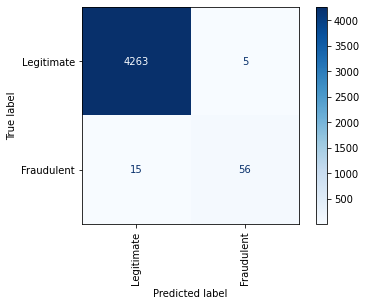

In [ ]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

labels = ['Legitimate', 'Fraudulent']
plot_confusion_matrix(lr_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')




A logistic-regression model correctly identified 4263 transactions as legitimate while misclassifying legitimate transactions as fraudulent just 5 times. We want to minimize the latter number because we don't want to annoy customers by declining legitimate transactions. Let's see if a random-forest classifier can do even better.


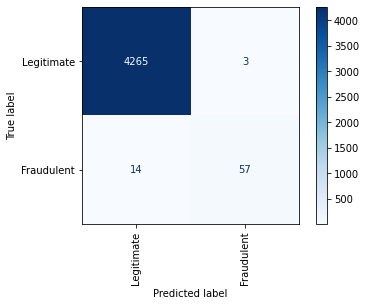

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

plot_confusion_matrix(rf_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

A random forest mistook just 3 legitimate transactions as fraudulent. That's an improvement over logistic regression. Let's see if a gradient-boosting classifier can do better still.


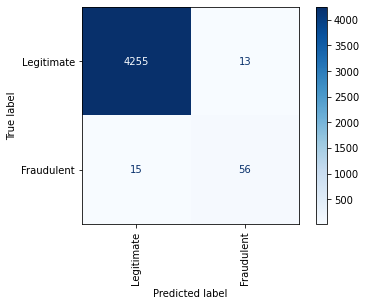

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=0)
gbm_model.fit(x_train, y_train)

plot_confusion_matrix(gbm_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')




The GBM misclassified more legitimate transactions than the random forest, so we'll stick with the random forest. Out of 4268 legitimate transactions, the random forest correctly classified 4265 of them. This means that legitimate transactions are classified correctly more than 99.99% of the time. Meanwhile, the model caught about 75% of the fraudulent transactions.

Unfortunately, we can't make predictions with this model because we don't know the meaning of the numbers in the "V1" through "V28" columns, and we can't generate them because we don't have the PCA transform applied to the original dataset. Nor do we know what the original dataset looked like. However, we have proved the principle that given the right features, we can build a classification model that is reasonably accurate at detecting credit-card fraud.
